In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

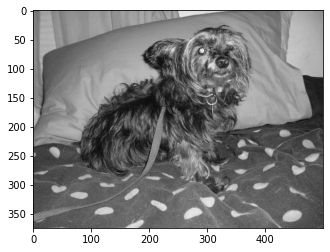

In [2]:
DATADIR = "PetImages_data"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #create a path -> path_name/path_name
#     print(path)
    for img in os.listdir(path): #path_name/path_name/file_name
#         print(img)
        img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE) #read this file
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [3]:
print(img_array.shape)

(375, 500)


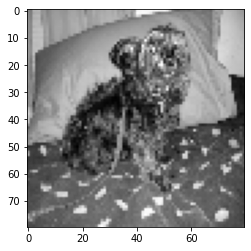

In [4]:
IMG_SIZE = 80

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [5]:
print(new_array.shape)

(80, 80)


In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [7]:
print(len(training_data))

24946


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])


0
0
0
0
0
0
0
0
1
1


In [10]:
X  =[]
Y = []

In [11]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [13]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()


In [14]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [15]:
X[1]

array([[[ 84],
        [ 97],
        [109],
        ...,
        [ 70],
        [ 77],
        [ 87]],

       [[120],
        [ 78],
        [135],
        ...,
        [108],
        [ 84],
        [ 74]],

       [[ 98],
        [ 89],
        [139],
        ...,
        [132],
        [ 77],
        [ 68]],

       ...,

       [[172],
        [145],
        [141],
        ...,
        [100],
        [ 97],
        [ 94]],

       [[139],
        [156],
        [151],
        ...,
        [ 94],
        [ 90],
        [101]],

       [[150],
        [158],
        [155],
        ...,
        [ 94],
        [ 77],
        [104]]], dtype=uint8)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [17]:
X = pickle.load(open("X.pickle", "rb"))
Y = pickle.load(open("Y.pickle", "rb"))

In [ ]:

Y  = np.array(Y)

X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

model.fit(X,Y, batch_size=32, epochs=1, validation_split=0.1)

496/702 [====================>.........] - ETA: 1:03 - loss: 0.6919 - accuracy: 0.5848